## Contextual Knowledge Research

Gyroscope
* measures angular velocity (rotation)

Accelerometer
* measure acceleration (along the axis)
* does not know orientation

Jerk
* change in acceleration
* total jerk magnitude is completely orientation-independent 
* reflects only body-related accelerations
* useful when acceleration signals are noisy

Median Absolute Deviation
* average distance of the data points from the median

Signal Magnitude Area
* signal magnitude area (SMA) to determine whether something was moving or stationary within each window. 
* SMA was calculated by subtracting the mean of the window from each of the accelerometer axes, integrating the absolute value of the result over a full window, and dividing by the window size (T). 
* From: https://www.rehab.research.va.gov/jour/2013/509/jrrd-2012-12-0233.html 

Autoregression Coefficients
* AR(4): y(t) = b0 + b1 y(t - 1) + b2 y(t-2) + b3 y(t-3) + b4 y(t-4)
* coefficients in dataset probably refer to b1, b2, b3 and b4





## Data Observations

tBodyAcc, tGravityAcc, tBodyAccJerk, tBodyGyro, tBodyGyroJerk
* mean, std mad, max, min, energy, iqr: 3 values for x, y and z direction
* sma, entropy: 1 value
* arCoeff: 12 values, 4 for each x, y and z direction
* correlation: correlation bewteen each x, y and z direction (which value represents what?)
* maxInd, meanFreq, skewness, kurtosis, bandsEnergy, angle: NA

tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag
* mean, std mad, max, min, sma, energy, iqr, entropy:1 value
* arCoeff: 4 values
* correlation: NA
* maxInd, meanFreq, skewness, kurtosis, bandsEnergy, angle: NA

fBodyAcc, fGravityAcc, fBodyAccJerk, fBodyGyro, fBodyGyroJerk
* mean, std mad, max, min, energy, iqr, maxInd, meanFreq: 3 values for x, y and z direction (diff bewteen mean and meanFreq?)
* sma, entropy, skewness, kurtosis: 1 value
* bands energy: 42 values (why?)
* arCoeff, correlation, angle: NA

fBodyAccMag, fGravityAccMag, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag
* mean, std mad, max, min, energy, iqr, sma, entropy, maxInd, meanFreq, skewness, kurtosis: 1 value
* bands energy, arCoeff, correlation, angle: NA

Other values:
* tBodyAcc-AngleWRTGravity-1     
* tBodyAccJerk-AngleWRTGravity-1 
* tBodyGyro-AngleWRTGravity-1    
* tBodyGyroJerk-AngleWRTGravity-1
* tXAxisAcc-AngleWRTGravity-1    
* tYAxisAcc-AngleWRTGravity-1    
* tZAxisAcc-AngleWRTGravity-1 






## Import Libraries

In [2]:
## Data Cleaning Libraries
import pandas as pd
import numpy as np

## Data Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Model Training Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Import Data

In [3]:
## Using manual colab upload
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')
subject_id_train = pd.read_csv('subject_id_train.txt',header=None)
subject_id_test = pd.read_csv('subject_id_test.txt',header=None)

## Data Cleaning


In [ ]:
## Adding y variable
train_data = pd.concat([x_train, y_train],axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

## Adding subject id to train and test data
subject_id_train.columns = ['subject_id']
train_data = pd.concat([train_data,subject_id_train],axis=1)

subject_id_test.columns = ['subject_id']
test_data = pd.concat([test_data,subject_id_test],axis=1)

## Removing white spaces form column names
train_data.columns = train_data.columns.str.rstrip()
test_data.columns = test_data.columns.str.rstrip()

In [ ]:
train_data

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0            0.043580        -0.005970        -0.035054       -0.995381   
1            0.039480        -0.002131        -0.029067       -0.998348   
2            0.039978        -0.005153        -0.022651       -0.995482   
3            0.039785        -0.011809        -0.028916       -0.996194   
4            0.038758        -0.002289        -0.023863       -0.998241   
...               ...              ...              ...             ...   
7762         0.048048        -0.042445        -0.065884       -0.195448   
7763         0.037639         0.006430        -0.044345       -0.235372   
7764         0.037451        -0.002724         0.021009       -0.218281   
7765         0.044011        -0.004536        -0.051242       -0.219202   
7766         0.068954         0.001810        -0.080323       -0.269336   

      tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0          -0.988366       -0.937382       -0.995007       -0.988816   
1          -0.982945       -0.971273       -0.998702       -0.983315   
2          -0.977314       -0.984760       -0.996415       -0.975835   
3          -0.988569       -0.993256       -0.996994       -0.988526   
4          -0.986774       -0.993115       -0.998216       -0.986479   
...              ...             ...             ...             ...   
7762       -0.278326       -0.219954       -0.282233       -0.305861   
7763       -0.302680       -0.232843       -0.322483       -0.354464   
7764       -0.378082       -0.076950       -0.304446       -0.400661   
7765       -0.383350       -0.081035       -0.310419       -0.380233   
7766       -0.366553       -0.147294       -0.377332       -0.360597   

      tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-Kurtosis-1  \
0          -0.953325       -0.794796  ...                    -0.713308   
1          -0.974000       -0.802537  ...                    -0.860677   
2          -0.985973       -0.798477  ...                    -0.761847   
3          -0.993135       -0.798477  ...                    -0.491604   
4          -0.993825       -0.801982  ...                    -0.702490   
...              ...             ...  ...                          ...   
7762       -0.357803        0.267874  ...                    -0.879026   
7763       -0.345592        0.181271  ...                    -0.684496   
7764       -0.193071        0.113141  ...                    -0.317314   
7765       -0.201007        0.166671  ...                    -0.356579   
7766       -0.255505        0.321881  ...                    -0.742972   

      tBodyAcc-AngleWRTGravity-1  tBodyAccJerk-AngleWRTGravity-1  \
0                      -0.112754                        0.030400   
1                       0.053477                       -0.007435   
2                      -0.118559                        0.177899   
3                      -0.036788                       -0.012892   
4                       0.123320                        0.122542   
...                          ...                             ...   
7762                   -0.190437                        0.829718   
7763                    0.064907                        0.875679   
7764                    0.052806                       -0.266724   
7765                   -0.101360                        0.700740   
7766                   -0.280088                       -0.007739   

      tBodyGyro-AngleWRTGravity-1  tBodyGyroJerk-AngleWRTGravity-1  \
0                       -0.464761                        -0.018446   
1                       -0.732626                         0.703511   
2                        0.100699                         0.808529   
3                        0.640011                        -0.485366   
4                        0.693578                        -0.615971   
...                           ...                              ...   
7762                     0.206972           

In [ ]:
test_data

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0            0.030914        -0.008927         0.040382       -0.938504   
1            0.042548         0.001079        -0.026236       -0.975516   
2            0.038297        -0.011660        -0.025643       -0.993922   
3            0.036205        -0.018148        -0.025240       -0.994845   
4            0.038034        -0.013437        -0.032899       -0.993955   
...               ...              ...              ...             ...   
3157         0.052279        -0.038687        -0.013494       -0.287933   
3158         0.073745        -0.024673        -0.017836       -0.305455   
3159         0.068334         0.043822        -0.024135       -0.329706   
3160         0.023016         0.032345        -0.011830       -0.323182   
3161        -0.010846        -0.004134        -0.037678       -0.330114   

      tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0          -0.944626       -0.759334       -0.952398       -0.950281   
1          -0.977502       -0.960146       -0.986694       -0.978983   
2          -0.979215       -0.973030       -0.994298       -0.980535   
3          -0.981534       -0.976175       -0.995169       -0.983020   
4          -0.977493       -0.984290       -0.994006       -0.977354   
...              ...             ...             ...             ...   
3157       -0.403601       -0.431550       -0.356012       -0.433826   
3158       -0.286487       -0.417996       -0.373468       -0.354849   
3159       -0.335273       -0.456965       -0.387944       -0.423504   
3160       -0.465502       -0.426108       -0.392307       -0.520848   
3161       -0.441542       -0.394796       -0.430898       -0.480065   

      tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-Kurtosis-1  \
0          -0.802483       -0.757099  ...                    -0.709087   
1          -0.966820       -0.757099  ...                    -0.600867   
2          -0.977508       -0.799005  ...                    -0.645500   
3          -0.980785       -0.798401  ...                    -0.738474   
4          -0.985899       -0.798401  ...                    -0.846150   
...              ...             ...  ...                          ...   
3157       -0.534817        0.244280  ...                    -0.752788   
3158       -0.557925        0.244280  ...                    -0.703532   
3159       -0.604403        0.079255  ...                    -0.476335   
3160       -0.569571        0.079255  ...                    -0.623083   
3161       -0.533532       -0.031137  ...                    -0.446862   

      tBodyAcc-AngleWRTGravity-1  tBodyAccJerk-AngleWRTGravity-1  \
0                       0.006462                        0.162920   
1                      -0.083495                        0.017500   
2                      -0.034956                        0.202302   
3                      -0.017067                        0.154438   
4                      -0.002223                       -0.040046   
...                          ...                             ...   
3157                   -0.337422                        0.346295   
3158                   -0.736701                       -0.372889   
3159                   -0.181560                        0.088574   
3160                    0.444558                       -0.819188   
3161                    0.598808                       -0.287951   

      tBodyGyro-AngleWRTGravity-1  tBodyGyroJerk-AngleWRTGravity-1  \
0                       -0.825886                         0.271151   
1                       -0.434375                         0.920593   
2                        0.064103                         0.145068   
3                        0.340134                         0.296407   
4                        0.736715                        -0.118545   
...                           ...                              ...   
3157                     0.884904           

In [ ]:
train_data.describe()

## Some notes:
## Features are normalized and bounded within [-1,1].

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
count      7767.000000      7767.000000      7767.000000     7767.000000   
mean          0.038759        -0.000647        -0.018155       -0.599017   
std           0.101996         0.099974         0.089927        0.441481   
min          -1.000000        -1.000000        -1.000000       -1.000000   
25%           0.032037        -0.011209        -0.028448       -0.992140   
50%           0.038975        -0.002921        -0.019602       -0.914202   
75%           0.044000         0.004303        -0.011676       -0.246026   
max           1.000000         1.000000         1.000000        1.000000   

       tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
count     7767.000000     7767.000000     7767.000000     7767.000000   
mean        -0.634424       -0.691270       -0.623886       -0.657884   
std          0.367558        0.321641        0.418113        0.348005   
min         -1.000000       -1.000000       -1.000000       -1.000000   
25%         -0.983570       -0.984661       -0.992902       -0.984131   
50%         -0.827970       -0.827696       -0.924421       -0.838559   
75%         -0.313069       -0.450478       -0.294903       -0.362671   
max          0.945956        1.000000        1.000000        0.960341   

       tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-Skewness-1  \
count     7767.000000     7767.000000  ...                  7767.000000   
mean        -0.740154       -0.360200  ...                    -0.316548   
std          0.272619        0.499259  ...                     0.313899   
min         -1.000000       -1.000000  ...                    -1.000000   
25%         -0.986661       -0.795613  ...                    -0.548129   
50%         -0.852735       -0.717007  ...                    -0.353980   
75%         -0.540521        0.054178  ...                    -0.137462   
max          1.000000        1.000000  ...                     0.938491   

       fBodyGyroJerkMag-Kurtosis-1  tBodyAcc-AngleWRTGravity-1  \
count                  7767.000000                 7767.000000   
mean                     -0.625132                    0.016774   
std                       0.302581                    0.331326   
min                      -1.000000                   -0.976580   
25%                      -0.843966                   -0.108225   
50%                      -0.710071                    0.017627   
75%                      -0.503837                    0.167695   
max                       0.911653                    1.000000   

       tBodyAccJerk-AngleWRTGravity-1  tBodyGyro-AngleWRTGravity-1  \
count                     7767.000000                  7767.000000   
mean                         0.018471                     0.009239   
std                          0.443540                     0.601208   
min                         -1.000000                    -1.000000   
25%                         -0.261002                    -0.470267   
50%                          0.029079                     0.001515   
75%                          0.314876                     0.496871   
max                          1.000000                     0.998702   

       tBodyGyroJerk-AngleWRTGravity-1  tXAxisAcc-AngleWRTGravity-1  \
count                      7767.000000                  7767.000000   
mean                         -0.005184                    -0.485936   
std                           0.477218                     0.509278   
min                          -1.000000                    -1.000000   
25%                          -0.373565                    -0.810953   
50%                          -0.005503                    -0.706619   
75%                           0.352690                    -0.488765   
max                           0.991288                     1.000000   

       tYAxisAcc-AngleWRTGravity-1  tZAxisAcc-AngleWRTGravity-1   subject_id  
count                  7767.000000         

In [ ]:
test_data.describe()
## Some notes:
## Features are normalized and bounded within [-1,1].

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
count      3162.000000      3162.000000      3162.000000     3162.000000   
mean          0.040530        -0.001695        -0.019453       -0.609770   
std           0.101559         0.102384         0.083897        0.405103   
min          -0.751552        -0.962639        -0.814359       -0.999715   
25%           0.031544        -0.011462        -0.028986       -0.990017   
50%           0.038861        -0.002700        -0.019488       -0.807078   
75%           0.043751         0.005224        -0.011233       -0.270904   
max           0.976950         0.989925         0.766017        0.465271   

       tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
count     3162.000000     3162.000000     3162.000000     3162.000000   
mean        -0.631731       -0.711263       -0.636741       -0.654112   
std          0.360294        0.284112        0.379665        0.342661   
min         -0.999611       -0.999911       -0.999274       -0.999319   
25%         -0.979300       -0.981256       -0.991374       -0.980940   
50%         -0.686914       -0.738534       -0.828256       -0.707638   
75%         -0.358639       -0.487716       -0.324933       -0.403433   
max          1.000000        0.848957        0.439686        1.000000   

       tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-Skewness-1  \
count     3162.000000     3162.000000  ...                  3162.000000   
mean        -0.758061       -0.358429  ...                    -0.284730   
std          0.241093        0.479339  ...                     0.313079   
min         -0.999505       -0.893297  ...                    -0.997185   
25%         -0.983562       -0.793628  ...                    -0.522444   
50%         -0.778504       -0.673711  ...                    -0.322259   
75%         -0.578883        0.052758  ...                    -0.095637   
max          0.689027        0.909166  ...                     1.000000   

       fBodyGyroJerkMag-Kurtosis-1  tBodyAcc-AngleWRTGravity-1  \
count                  3162.000000                 3162.000000   
mean                     -0.595537                    0.015090   
std                       0.309507                    0.329827   
min                      -0.985065                   -1.000000   
25%                      -0.828862                   -0.111039   
50%                      -0.681600                    0.013685   
75%                      -0.452381                    0.161560   
max                       1.000000                    0.998898   

       tBodyAccJerk-AngleWRTGravity-1  tBodyGyro-AngleWRTGravity-1  \
count                     3162.000000                  3162.000000   
mean                         0.021202                     0.043183   
std                          0.442320                     0.626639   
min                         -0.993402                    -0.998898   
25%                         -0.252667                    -0.493294   
50%                          0.032937                     0.043555   
75%                          0.316195                     0.609499   
max                          0.986347                     1.000000   

       tBodyGyroJerk-AngleWRTGravity-1  tXAxisAcc-AngleWRTGravity-1  \
count                      3162.000000                  3162.000000   
mean                         -0.020684                    -0.511371   
std                           0.501336                     0.506231   
min                          -0.990616                    -0.983811   
25%                          -0.438279                    -0.828871   
50%                          -0.022624                    -0.728029   
75%                           0.387438                    -0.528704   
max                           1.000000                     0.829446   

       tYAxisAcc-AngleWRTGravity-1  tZAxisAcc-AngleWRTGravity-1   subject_id  
count                  3162.000000         

In [ ]:
print(train_data.subject_id.unique())
print(test_data.subject_id.unique())

## Some notes:
## Train and test set is split by subject

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
[ 2  4  9 10 12 13 18 20 24]


In [ ]:
train_data.Label.unique().tolist()

['STANDING',
 'STAND_TO_SIT',
 'SITTING',
 'SIT_TO_STAND',
 'STAND_TO_LIE',
 'LAYING',
 'LIE_TO_SIT',
 'SIT_TO_LIE',
 'LIE_TO_STAND',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

## Data Visualisations

### Time Domain Features

In [ ]:
## Plotting mean values for each time feature for each label for subject 1

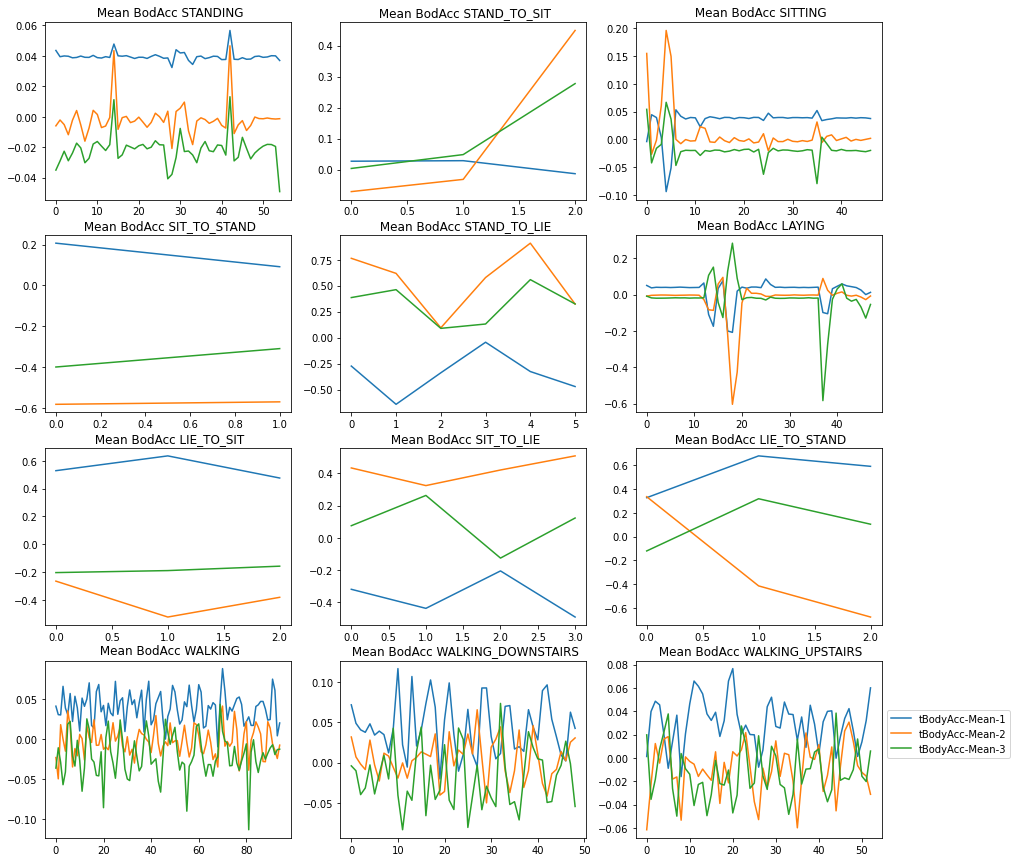

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyAcc-Mean-1", 
                                                                                                        "tBodyAcc-Mean-2", 
                                                                                                        "tBodyAcc-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyAcc-Mean-1"],
          row_index, bodacc_subject1["tBodyAcc-Mean-2"],
          row_index, bodacc_subject1["tBodyAcc-Mean-3"])
  plt.title("Mean BodAcc " + label)
  count += 1

plt.legend(['tBodyAcc-Mean-1','tBodyAcc-Mean-2','tBodyAcc-Mean-3'], bbox_to_anchor=(1, 0.75))

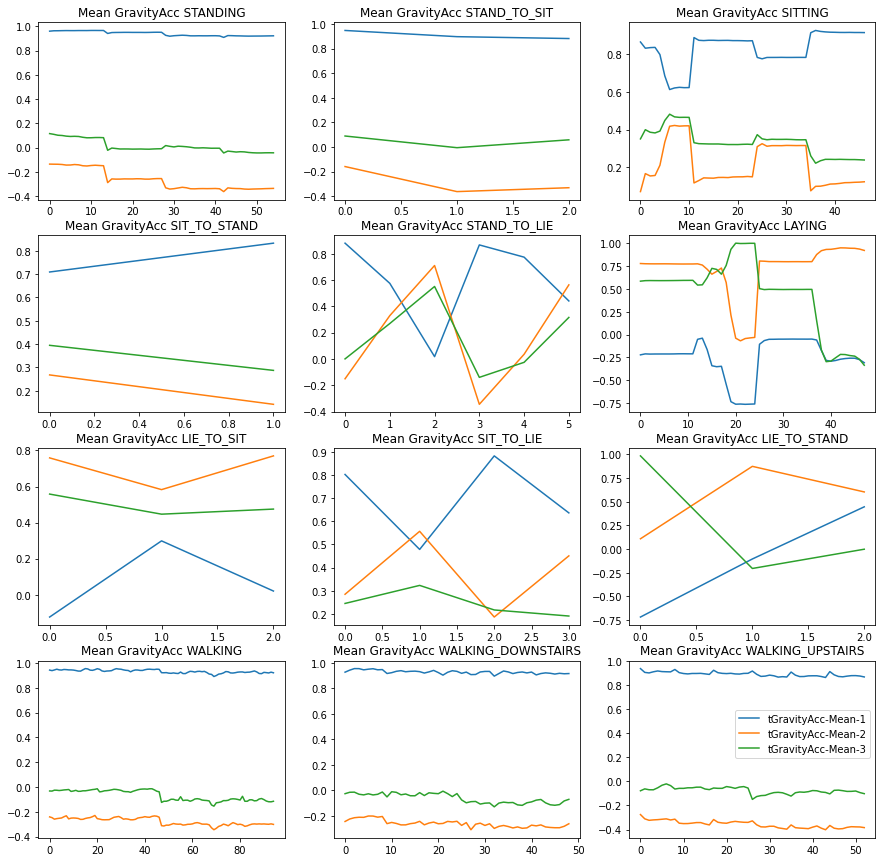

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tGravityAcc-Mean-1", 
                                                                                            "tGravityAcc-Mean-2", 
                                                                                            "tGravityAcc-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tGravityAcc-Mean-1"],
          row_index, bodacc_subject1["tGravityAcc-Mean-2"],
          row_index, bodacc_subject1["tGravityAcc-Mean-3"])
  plt.title("Mean GravityAcc " + label)
  count += 1

plt.legend(['tGravityAcc-Mean-1','tGravityAcc-Mean-2','tGravityAcc-Mean-3'], bbox_to_anchor=(1, 0.75))

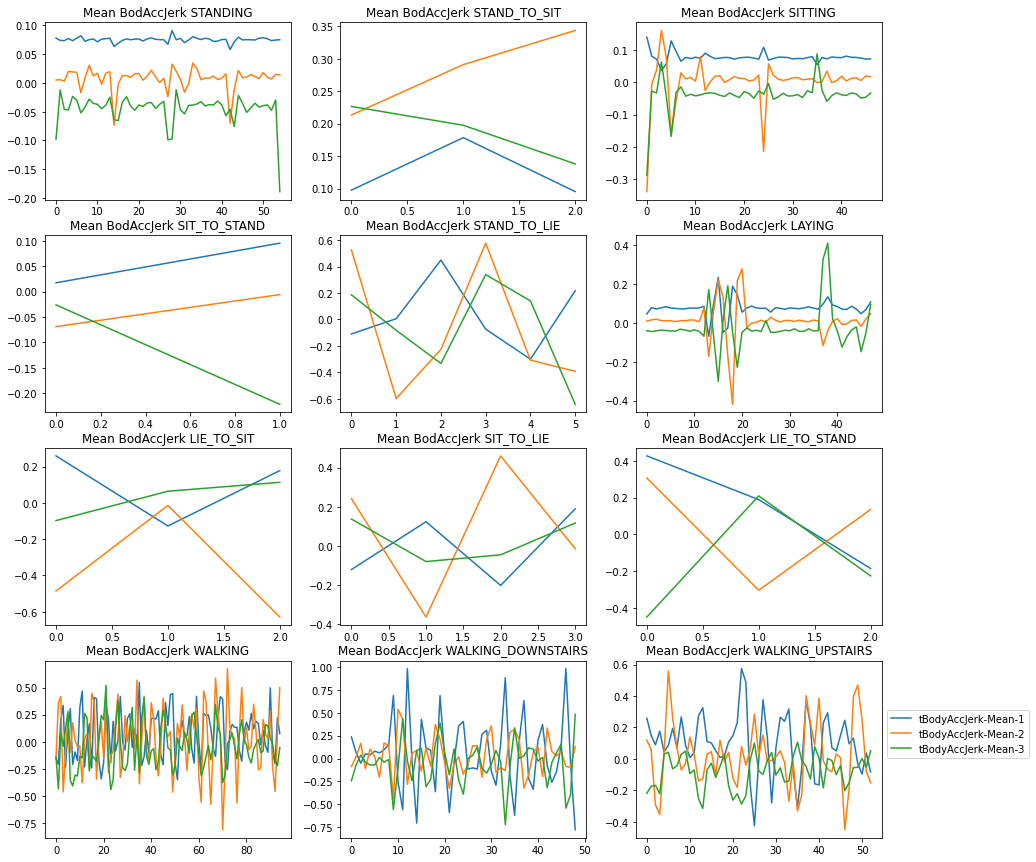

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyAccJerk-Mean-1", 
                                                                                            "tBodyAccJerk-Mean-2", 
                                                                                            "tBodyAccJerk-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyAccJerk-Mean-1"],
          row_index, bodacc_subject1["tBodyAccJerk-Mean-2"],
          row_index, bodacc_subject1["tBodyAccJerk-Mean-3"])
  plt.title("Mean BodAccJerk " + label)
  count += 1

plt.legend(['tBodyAccJerk-Mean-1','tBodyAccJerk-Mean-2','tBodyAccJerk-Mean-3'], bbox_to_anchor=(1, 0.75))

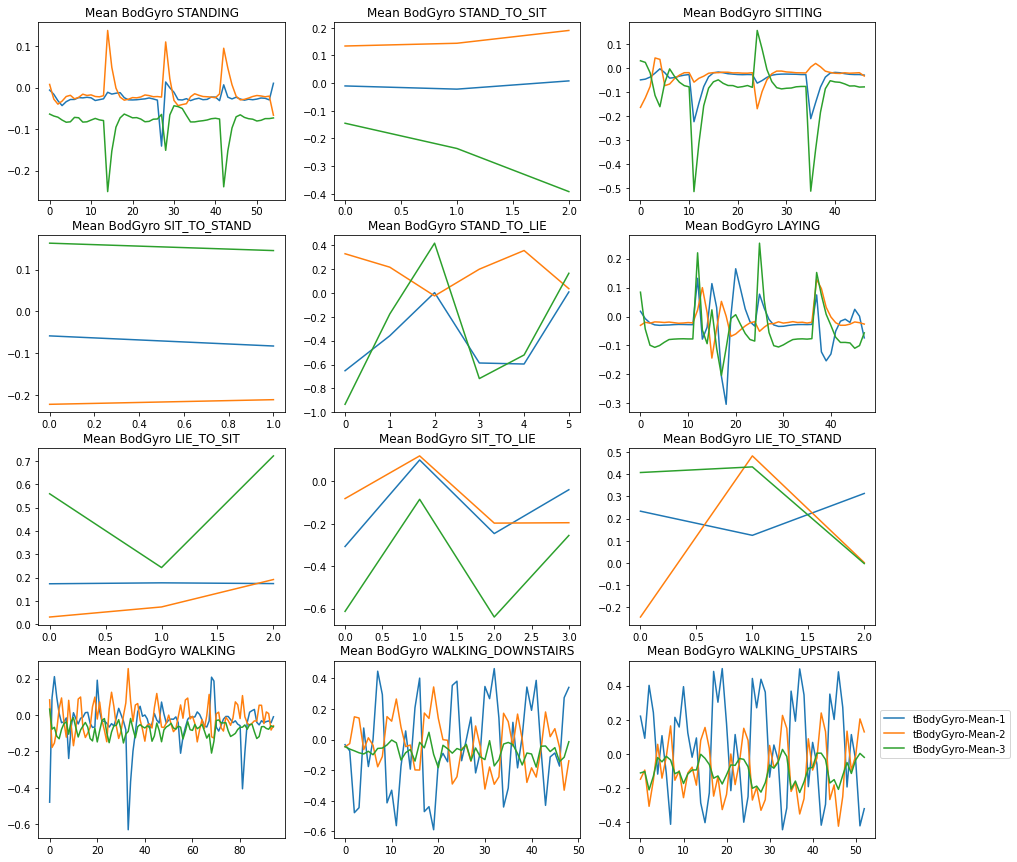

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyGyro-Mean-1", 
                                                                                            "tBodyGyro-Mean-2", 
                                                                                            "tBodyGyro-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyGyro-Mean-1"],
          row_index, bodacc_subject1["tBodyGyro-Mean-2"],
          row_index, bodacc_subject1["tBodyGyro-Mean-3"])
  plt.title("Mean BodGyro " + label)
  count += 1

plt.legend(['tBodyGyro-Mean-1','tBodyGyro-Mean-2','tBodyGyro-Mean-3'], bbox_to_anchor=(1, 0.75))

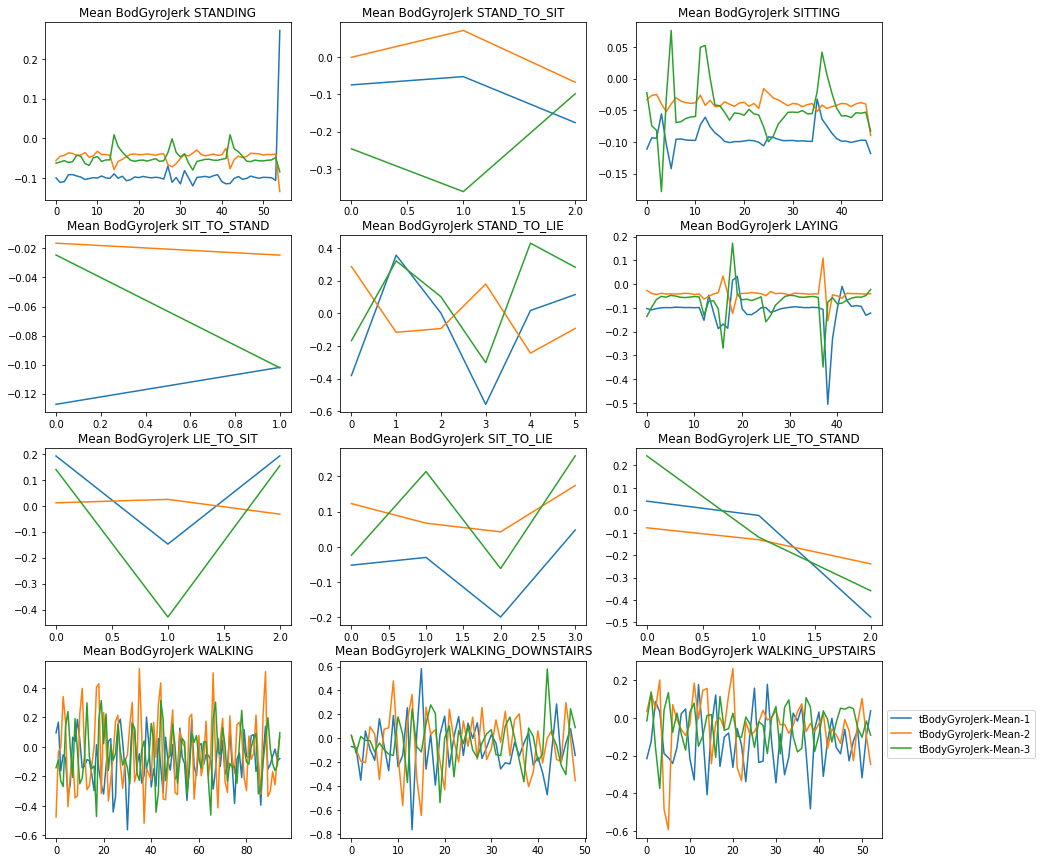

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyGyroJerk-Mean-1", 
                                                                                            "tBodyGyroJerk-Mean-2", 
                                                                                            "tBodyGyroJerk-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyGyroJerk-Mean-1"],
          row_index, bodacc_subject1["tBodyGyroJerk-Mean-2"],
          row_index, bodacc_subject1["tBodyGyroJerk-Mean-3"])
  plt.title("Mean BodGyroJerk " + label)
  count += 1

plt.legend(['tBodyGyroJerk-Mean-1','tBodyGyroJerk-Mean-2','tBodyGyroJerk-Mean-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at energy for each label for subject 1

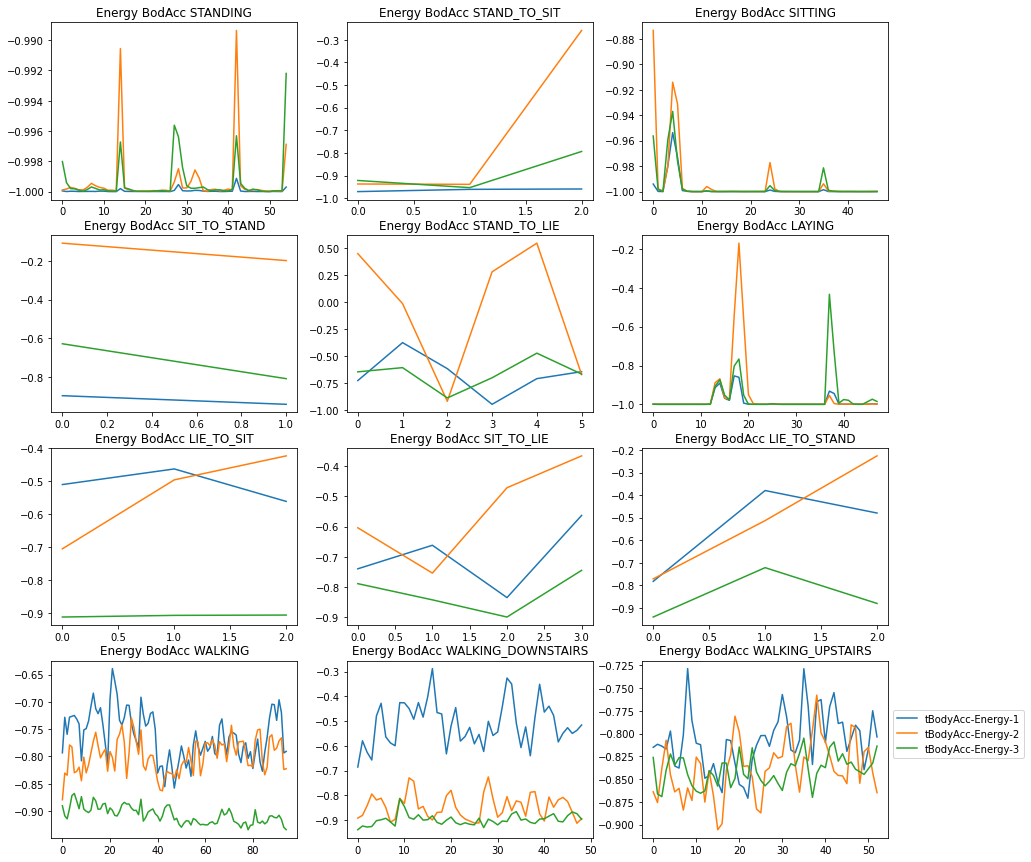

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyAcc-Energy-1", 
                                                                                                        "tBodyAcc-Energy-2", 
                                                                                                        "tBodyAcc-Energy-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyAcc-Energy-1"],
          row_index, bodacc_subject1["tBodyAcc-Energy-2"],
          row_index, bodacc_subject1["tBodyAcc-Energy-3"])
  plt.title("Energy BodAcc " + label)
  count += 1

plt.legend(['tBodyAcc-Energy-1','tBodyAcc-Energy-2','tBodyAcc-Energy-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at entropy for each label for subject 1

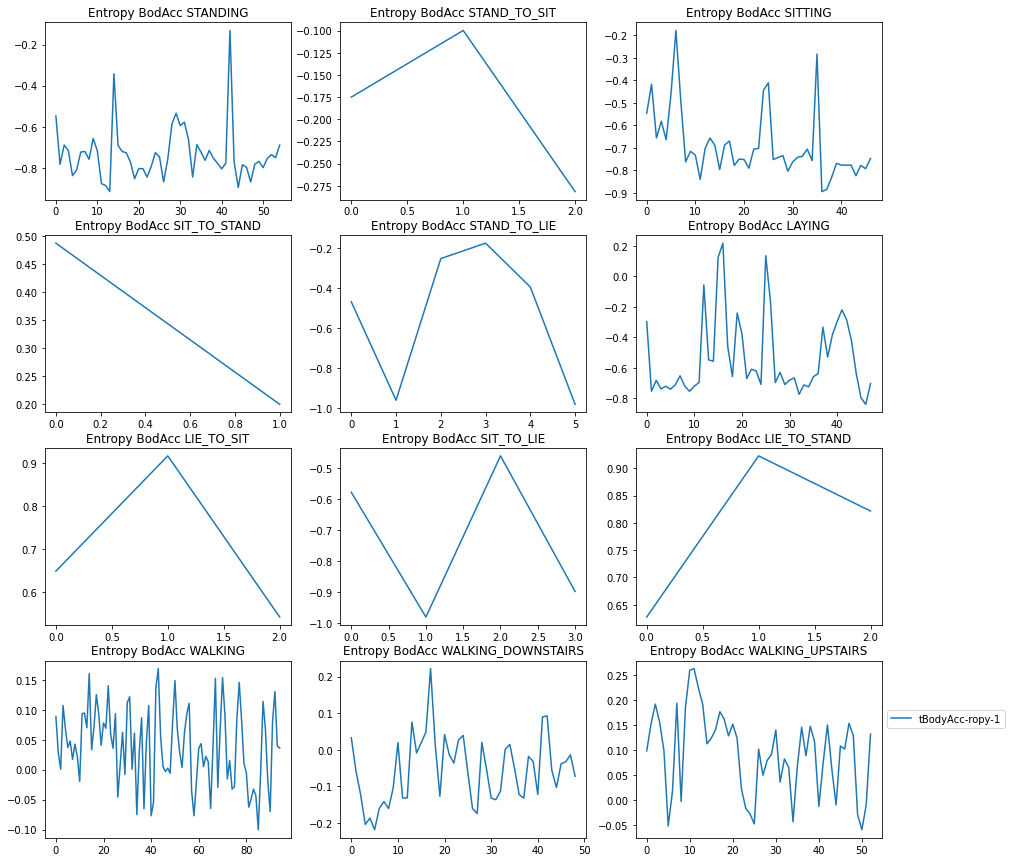

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["tBodyAcc-ropy-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("Entropy BodAcc " + label)
  count += 1

plt.legend(['tBodyAcc-ropy-1'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at sma for each label for subject 1

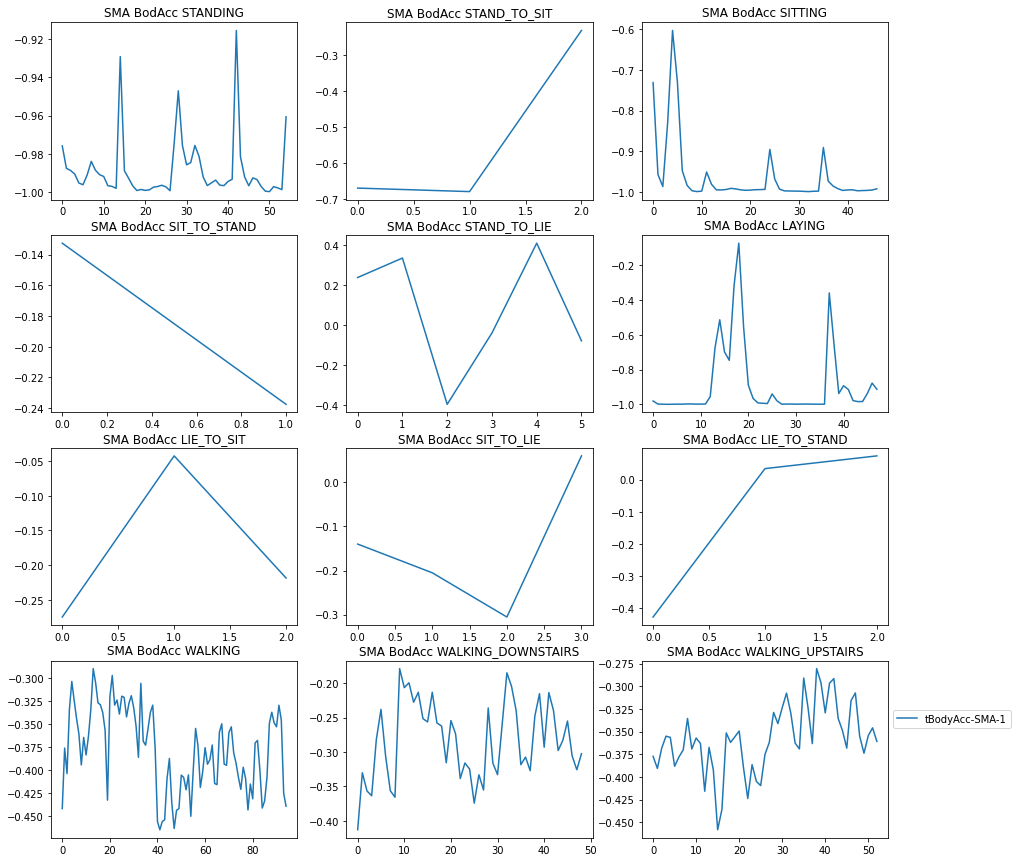

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["tBodyAcc-SMA-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("SMA BodAcc " + label)
  count += 1

plt.legend(['tBodyAcc-SMA-1'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at correlation for each label for subject 1

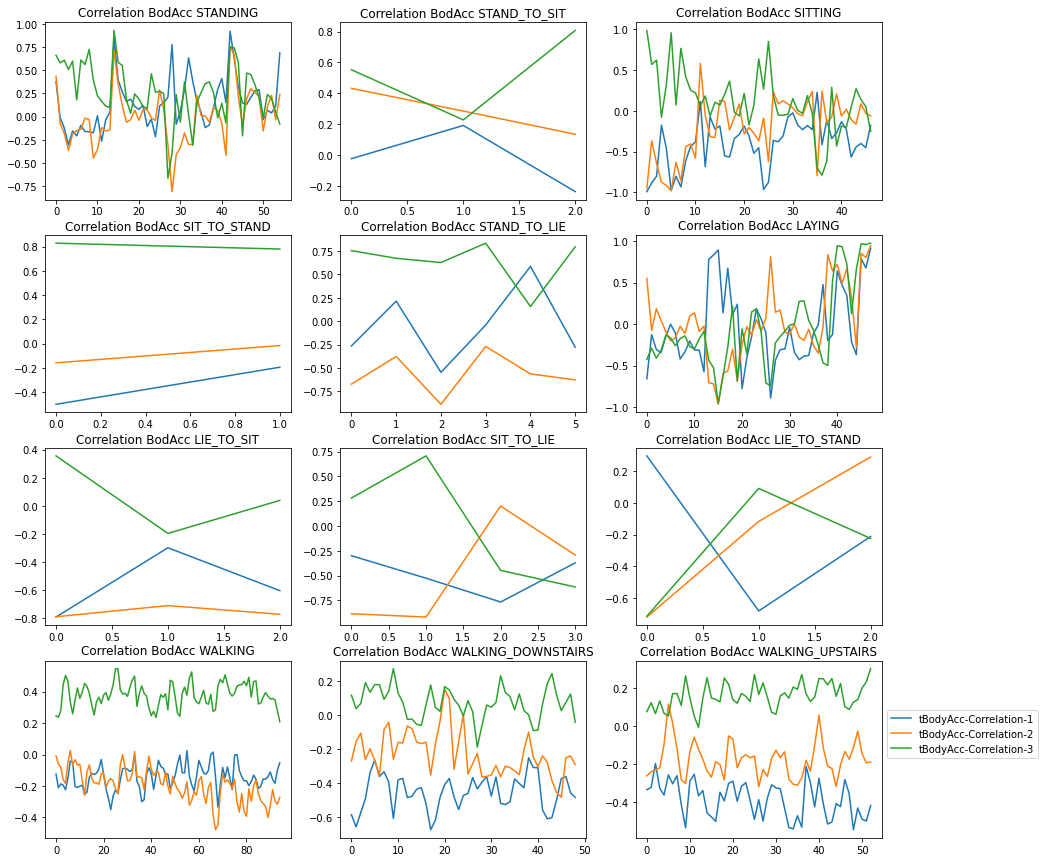

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["tBodyAcc-Correlation-1", 
                                                                                                        "tBodyAcc-Correlation-2", 
                                                                                                        "tBodyAcc-Correlation-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["tBodyAcc-Correlation-1"],
          row_index, bodacc_subject1["tBodyAcc-Correlation-2"],
          row_index, bodacc_subject1["tBodyAcc-Correlation-3"])
  plt.title("Correlation BodAcc " + label)
  count += 1

plt.legend(['tBodyAcc-Correlation-1','tBodyAcc-Correlation-2','tBodyAcc-Correlation-3'], bbox_to_anchor=(1, 0.75))

### Frequency Domain Features

In [ ]:
## Taking a look at mean for each label for fBodyAcc for subject 1

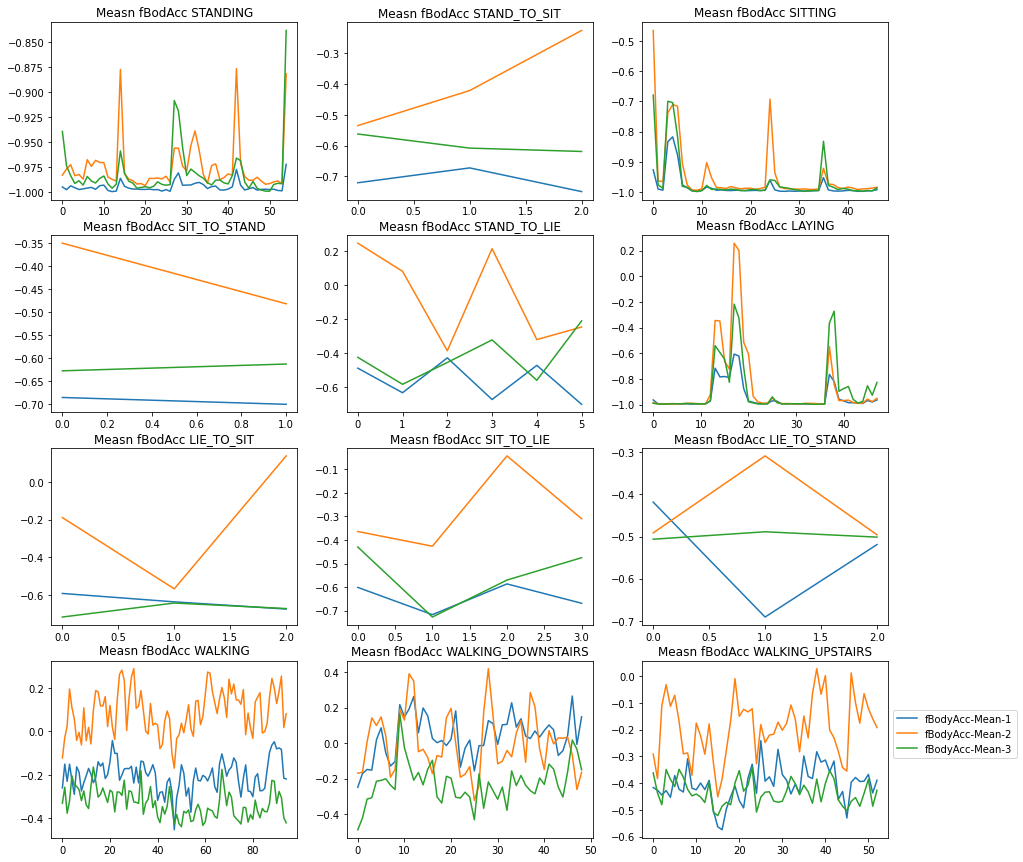

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["fBodyAcc-Mean-1", 
                                                                                                        "fBodyAcc-Mean-2", 
                                                                                                        "fBodyAcc-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["fBodyAcc-Mean-1"],
          row_index, bodacc_subject1["fBodyAcc-Mean-2"],
          row_index, bodacc_subject1["fBodyAcc-Mean-3"])
  plt.title("Measn fBodAcc " + label)
  count += 1

plt.legend(['fBodyAcc-Mean-1','fBodyAcc-Mean-2','fBodyAcc-Mean-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at meanFreq for each label for fBodyAcc for subject 1

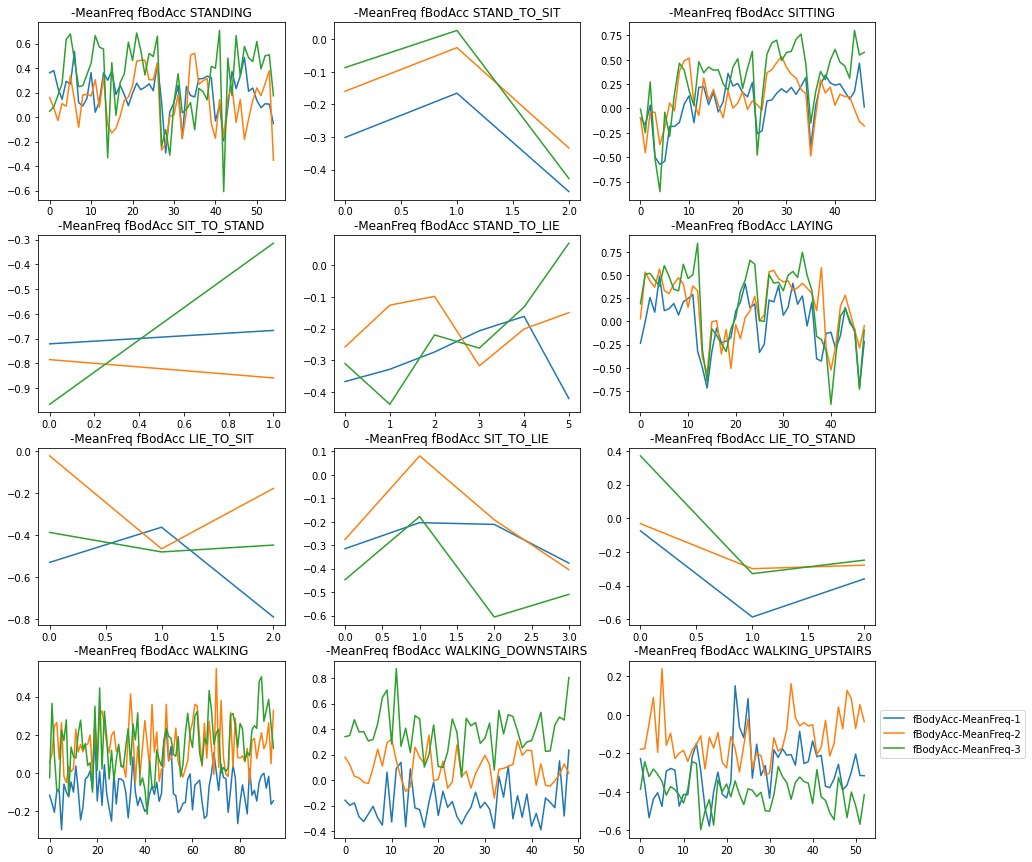

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["fBodyAcc-MeanFreq-1", 
                                                                                                        "fBodyAcc-MeanFreq-2", 
                                                                                                        "fBodyAcc-MeanFreq-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["fBodyAcc-MeanFreq-1"],
          row_index, bodacc_subject1["fBodyAcc-MeanFreq-2"],
          row_index, bodacc_subject1["fBodyAcc-MeanFreq-3"])
  plt.title("-MeanFreq fBodAcc " + label)
  count += 1

plt.legend(['fBodyAcc-MeanFreq-1','fBodyAcc-MeanFreq-2','fBodyAcc-MeanFreq-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at skewness for each label for fBodyAcc for subject 1

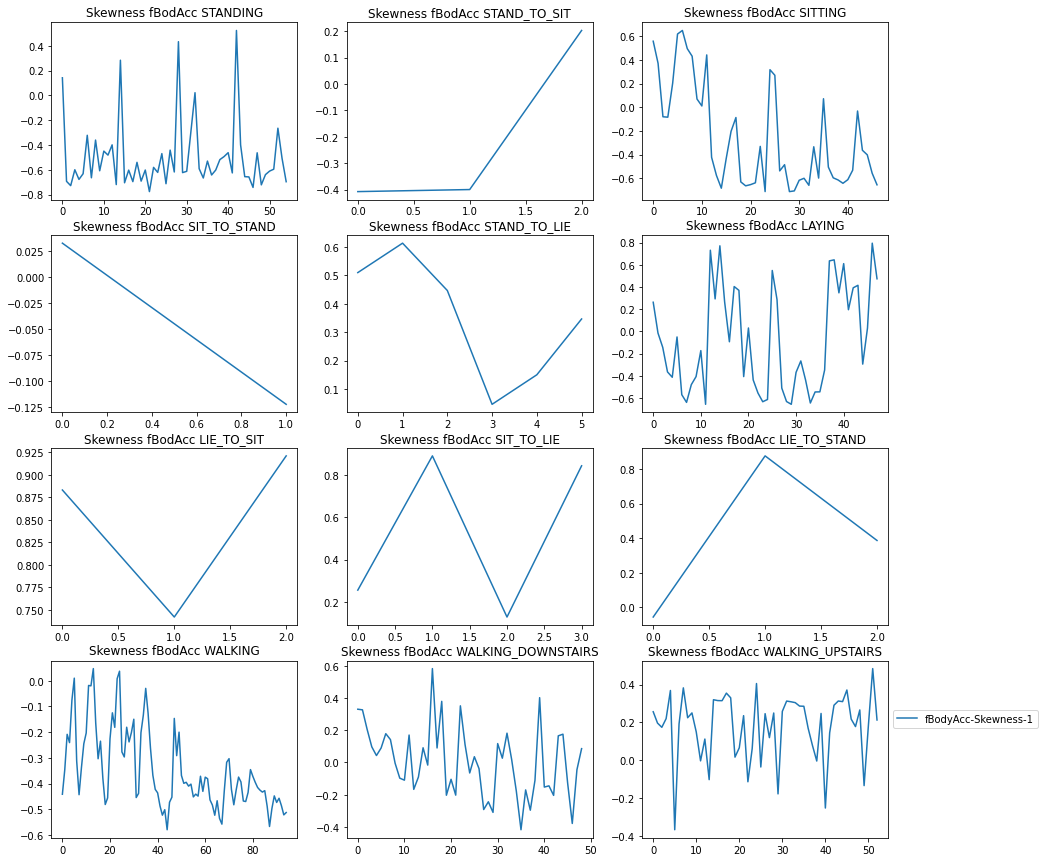

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["fBodyAcc-Skewness-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("Skewness fBodAcc " + label)
  count += 1

plt.legend(['fBodyAcc-Skewness-1'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at kurtosis for each label for fBodyAcc for subject 1

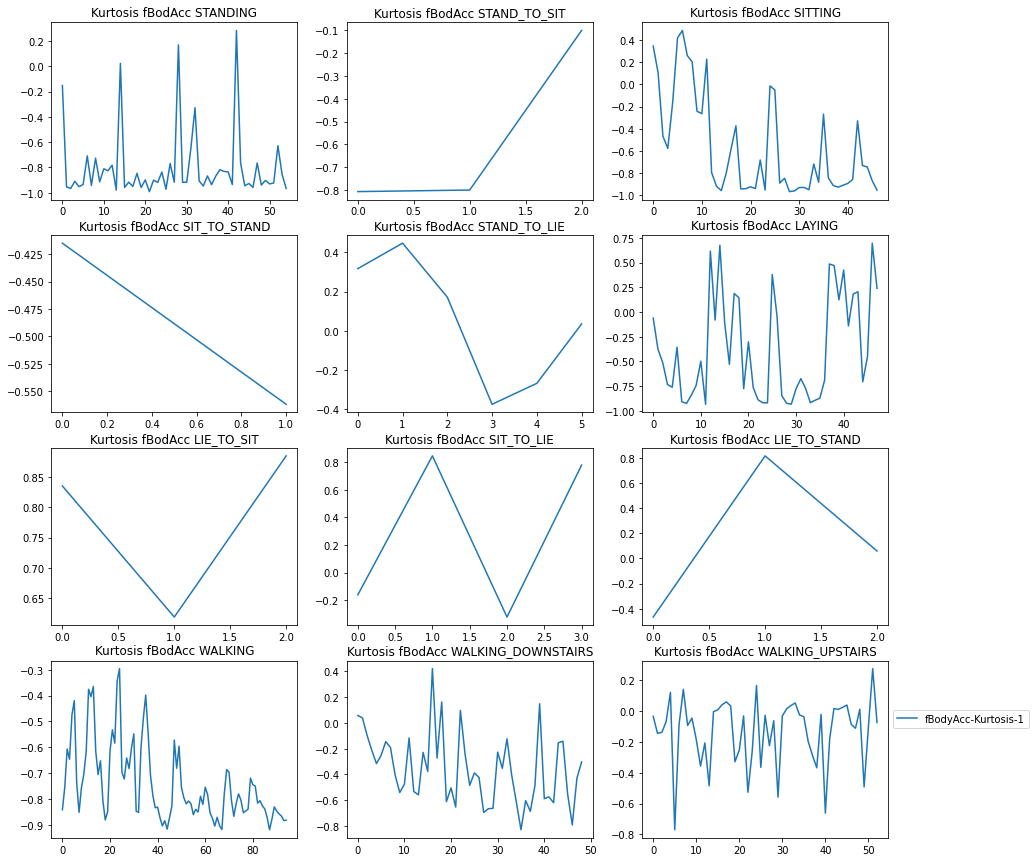

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["fBodyAcc-Kurtosis-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("Kurtosis fBodAcc " + label)
  count += 1

plt.legend(['fBodyAcc-Kurtosis-1'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at mean for each label for fBodyAccJerk for subject 1

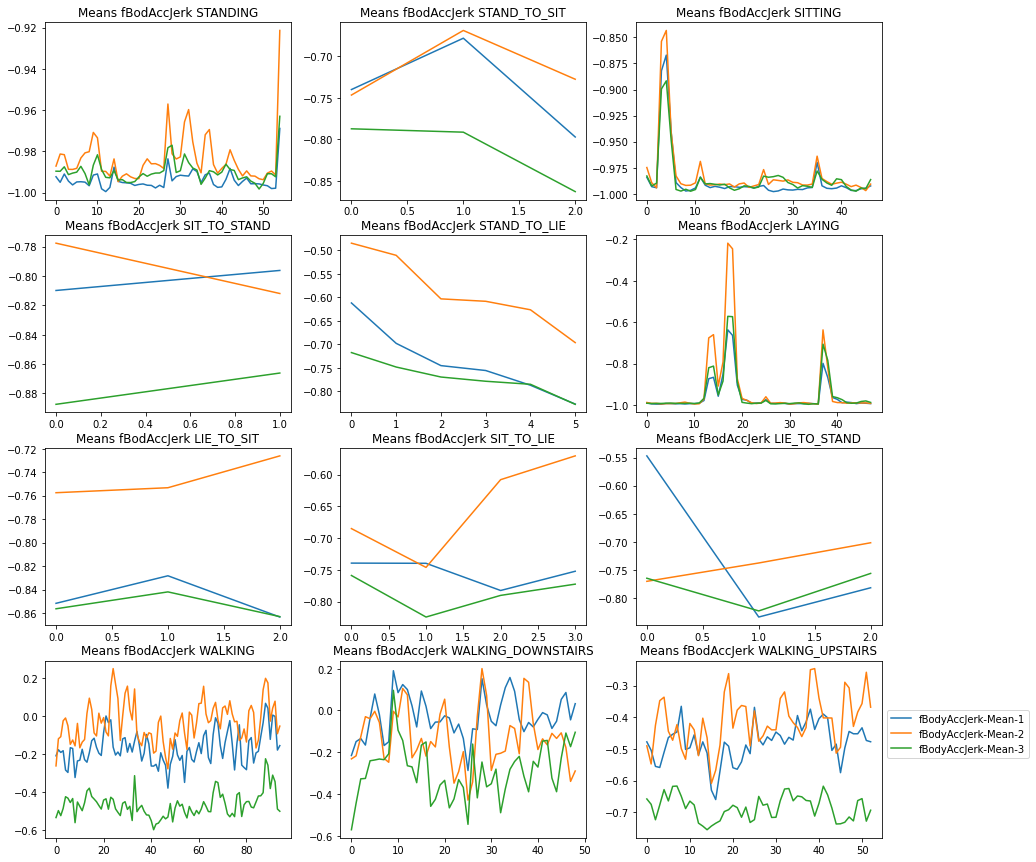

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["fBodyAccJerk-Mean-1", 
                                                                                                        "fBodyAccJerk-Mean-2", 
                                                                                                        "fBodyAccJerk-Mean-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["fBodyAccJerk-Mean-1"],
          row_index, bodacc_subject1["fBodyAccJerk-Mean-2"],
          row_index, bodacc_subject1["fBodyAccJerk-Mean-3"])
  plt.title("Means fBodAccJerk " + label)
  count += 1

plt.legend(['fBodyAccJerk-Mean-1','fBodyAccJerk-Mean-2','fBodyAccJerk-Mean-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at meanFreq for each label for fBodyAccJerk for subject 1

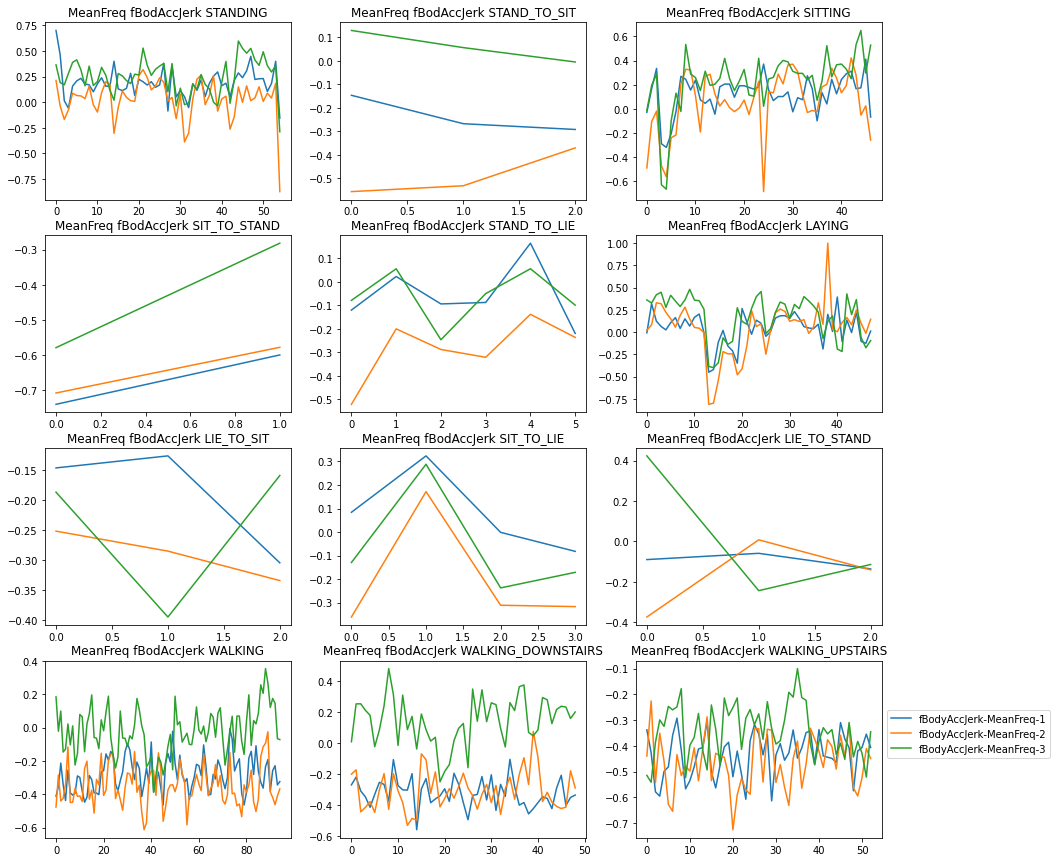

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)][["fBodyAccJerk-MeanFreq-1", 
                                                                                                        "fBodyAccJerk-MeanFreq-2", 
                                                                                                        "fBodyAccJerk-MeanFreq-3"]]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1["fBodyAccJerk-MeanFreq-1"],
          row_index, bodacc_subject1["fBodyAccJerk-MeanFreq-2"],
          row_index, bodacc_subject1["fBodyAccJerk-MeanFreq-3"])
  plt.title("MeanFreq fBodAccJerk " + label)
  count += 1

plt.legend(['fBodyAccJerk-MeanFreq-1','fBodyAccJerk-MeanFreq-2','fBodyAccJerk-MeanFreq-3'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at skewness for each label for fBodyAccJerk for subject 1

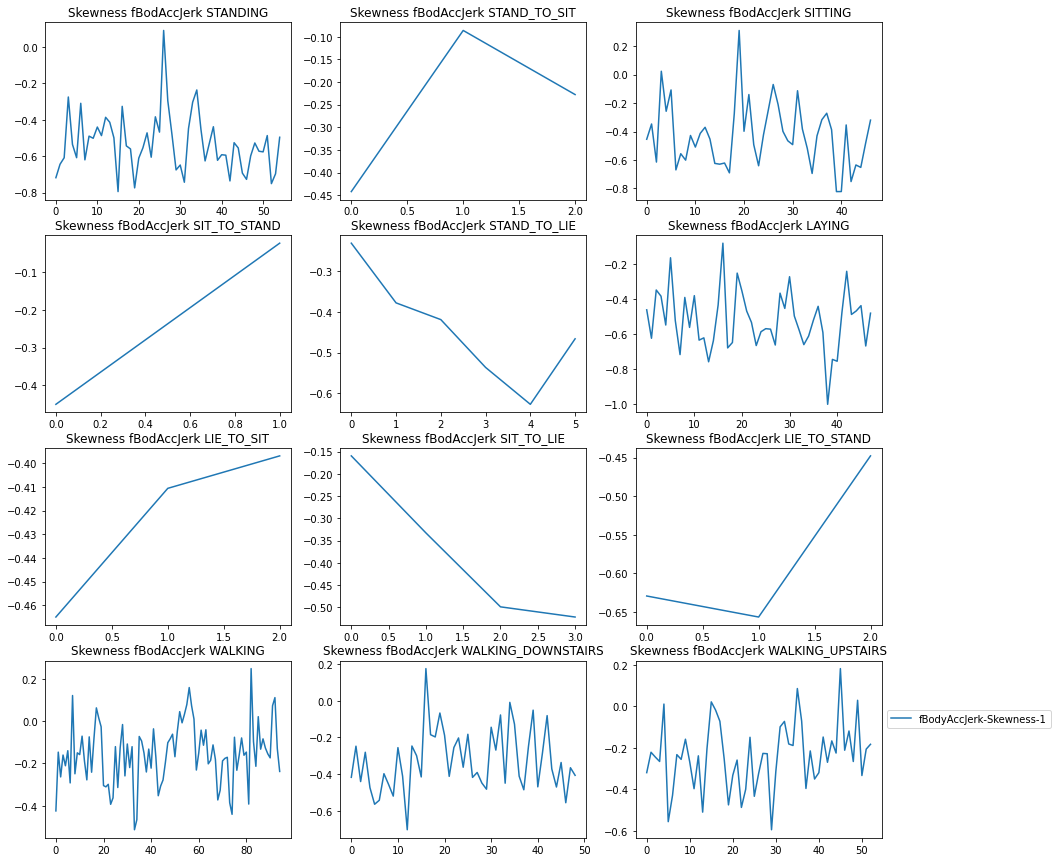

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["fBodyAccJerk-Skewness-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("Skewness fBodAccJerk " + label)
  count += 1

plt.legend(['fBodyAccJerk-Skewness-1'], bbox_to_anchor=(1, 0.75))

In [ ]:
## Taking a look at kurtosis for each label for fBodyAccJerk for subject 1

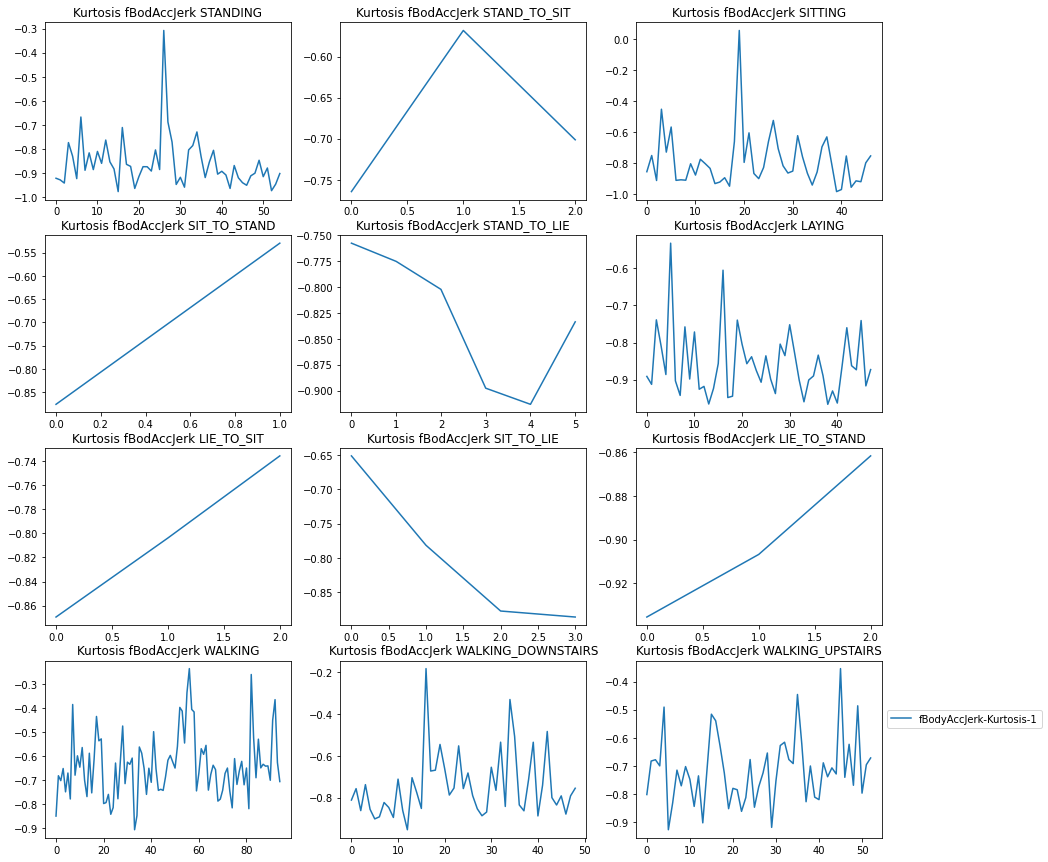

In [ ]:
labels = train_data.Label.unique().tolist()

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 3
count = 1

for label in labels: 
  bodacc_subject1 = train_data[(train_data.subject_id == 1) & (train_data.Label == label)]["fBodyAccJerk-Kurtosis-1"]
  row_index = range(len(bodacc_subject1))

  fig.add_subplot(rows, columns, count)
  plt.plot(row_index, bodacc_subject1)
  plt.title("Kurtosis fBodAccJerk " + label)
  count += 1

plt.legend(['fBodyAccJerk-Kurtosis-1'], bbox_to_anchor=(1, 0.75))

## Feature Selection

### Using ANOVA F-Test

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

score_list = []
k_list = []
for k in range(1, 301, 10):
  k_list.append(k)
  fs = SelectKBest(score_func=f_classif, k=k)
  fs.fit(x_train, np.ravel(y_train))
  cols = fs.get_support(indices=True)
  x_new_train_anova = x_train.iloc[:,cols]
  x_new_test_anova = x_test.iloc[:, cols]

  clf = LogisticRegression(solver="liblinear").fit(x_new_train_anova, np.ravel(y_train))
  y_pred = clf.predict(x_new_test_anova)
  score_list.append(accuracy_score(y_test, y_pred))


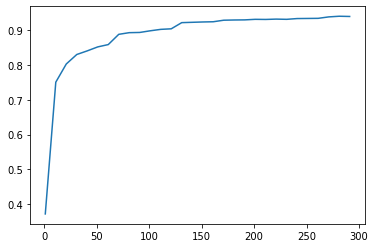

In [51]:
plt.plot(k_list, score_list)

### Using Mutual Information

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

score_list = []
k_list = []
for k in range(1, 301, 10):
  k_list.append(k)
  fs = SelectKBest(score_func=mutual_info_classif, k=k)
  fs.fit(x_train, np.ravel(y_train))
  cols = fs.get_support(indices=True)
  x_new_train_anova = x_train.iloc[:,cols]
  x_new_test_anova = x_test.iloc[:, cols]

  clf = LogisticRegression(solver="liblinear").fit(x_new_train_anova, np.ravel(y_train))
  y_pred = clf.predict(x_new_test_anova)
  score_list.append(accuracy_score(y_test, y_pred))

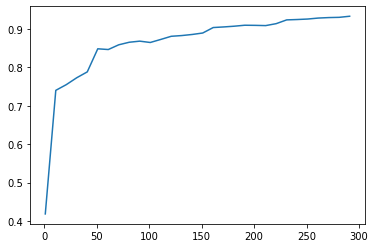

In [53]:
plt.plot(k_list, score_list)

## Feature Selection with Logistic Model

In [22]:
## Chose liblinear to solve convergence warning
clf = LogisticRegression(solver="liblinear").fit(x_train, np.ravel(y_train))

In [23]:
y_pred = clf.predict(x_test)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [24]:
accuracy_score(y_test, y_pred)

0.9456040480708412

In [26]:
clf.coef_

array([[-0.60627229,  0.03175063,  0.30268665, ...,  1.61136173,
        -0.36483529, -0.09740708],
       [ 0.62235458, -0.10322758, -0.11872857, ..., -0.01466271,
        -0.01340023, -0.30620303],
       [ 0.8292117 , -0.64102355, -0.54249516, ...,  0.24432994,
        -0.25914881, -0.15395481],
       ...,
       [-0.01790276, -0.16274506, -0.02782667, ..., -0.35729307,
        -0.17135059,  0.06059819],
       [ 0.30102102,  0.09843313,  0.12949105, ..., -0.67896094,
        -0.34526262, -0.12384846],
       [-0.33598487, -0.1527878 , -0.3678772 , ...,  0.87051235,
         1.07452311,  0.43984233]])

### Feature selection based on feature importance / coefficients

In [30]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression(solver="liblinear")).fit(x_train, y_train)
x_new = selector.transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
x_new.shape

(7767, 204)

In [32]:
cols = selector.get_support()
features_df = x_train.iloc[:,cols]
features_df.columns.to_list()

['tBodyAcc-Mean-1                ',
 'tBodyAcc-Mean-2                ',
 'tBodyAcc-STD-1                 ',
 'tBodyAcc-Mad-1                 ',
 'tBodyAcc-Max-1                 ',
 'tBodyAcc-Max-2                 ',
 'tBodyAcc-Max-3                 ',
 'tBodyAcc-Min-1                 ',
 'tBodyAcc-Min-2                 ',
 'tBodyAcc-Min-3                 ',
 'tBodyAcc-SMA-1                 ',
 'tBodyAcc-Energy-1              ',
 'tBodyAcc-Energy-2              ',
 'tBodyAcc-IQR-1                 ',
 'tBodyAcc-IQR-2                 ',
 'tBodyAcc-ropy-1                ',
 'tBodyAcc-ropy-1                .1',
 'tBodyAcc-ropy-1                .2',
 'tBodyAcc-ARCoeff-1             ',
 'tBodyAcc-ARCoeff-3             ',
 'tBodyAcc-ARCoeff-4             ',
 'tBodyAcc-ARCoeff-8             ',
 'tBodyAcc-ARCoeff-9             ',
 'tBodyAcc-ARCoeff-10            ',
 'tBodyAcc-ARCoeff-11            ',
 'tBodyAcc-ARCoeff-12            ',
 'tBodyAcc-Correlation-1         ',
 'tBodyAcc-Correlation-2

In [33]:
x_test_new = x_test.iloc[:, cols]

In [34]:
clf = LogisticRegression(solver="liblinear").fit(x_new, np.ravel(y_train))

In [35]:
y_pred = clf.predict(x_test_new)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [36]:
accuracy_score(y_test, y_pred)

0.9490828589500316

### Forward / Backward Feature Elimination

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(clf, n_features_to_select=50)
sfs.fit(x_train, np.ravel(y_train))

cols = sfs.get_support(indices=True)
features_df = x_train.iloc[:,cols]
features_df

## Why take so long to run

### RFE

In [ ]:
from yellowbrick.model_selection import RFECV

visualizer = RFECV(LogisticRegression(solver="liblinear"))

visualizer.fit(x_train, np.ravel(y_train))        # Fit the data to the visualizer
visualizer.show()    

## Take very long to run